# K-Means Clustering

### Overview
- Online retail is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.
- The steps are broadly:

  - Read and understand the data 
  - Clean the data
  - Prepare the data for modelling
  - Modelling
  - Final analysis and recommendations

### Data Set Information:

- This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.




### Attribute Information:

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.



## 1. Reading  and understanding  the data 

In [1]:
## importing basic libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
## filtering warnings
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset and checking it out

In [2]:
## importing the dataset
retail_df = pd.read_csv('Online+Retail.csv',sep=',',encoding='ISO-8859-1',header=0)
retail_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom


In [3]:
## let's see if there is any discrepancy in column names
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

- No discrepancy in columns names

In [4]:
## shape
retail_df.shape

(541909, 8)

In [5]:
## dtypes and null values
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


- CustomerID and Desciption has some null values 
- InvoiceDate is a date but is not in datetime format

In [6]:
## checking the percentage of null values in CustomerID
retail_df.isnull().sum()/len(retail_df.index)*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

- Null values in Description = 0.268311; negligible(can simply drop)
- Null values in CustomerID = 24.926694; let's see how we handle these

In [7]:
## let's see how many are continous and how many categorical
retail_df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [8]:
## looking at spread and outliers
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


- Scaling is a standard practice when we go for K-Means Clustering

## 2. Cleaning Data

In [9]:
## let's again look at the missingh values percentages
retail_df.isnull().sum()/len(retail_df.index)*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

- Null values in Description = 0.268311; negligible(can simply drop)
- Null values in CustomerID = 24.926694; We can't drop these many rows and we certainly can't drop this column as CustomerID is a crucial identifier.
   - So we'll have to choose the lesser evil here, we'll drop the rows as:
      - The dataset has quite large number of rows
      - We really can't impute CustomerID

In [10]:
## dropping rows with null values 
retail_df = retail_df.dropna()

In [11]:
## checking the shape again
retail_df.shape

(406829, 8)

## 3. Data Preperation

- First thing we want to pay attention is to look at how do we want to do the clustering itself.
- Here, as this problem is customer segmentation we will be goin for RFM analyis which is a standard baseline for modelling
  - R(Recency) : How recently was the last transaction done i.e number of days since last purchase 
  - F(Frequency) : Frequency or number of transaction done over a period 
  - M(Monetary) : Total revenue amount contributed by the customer 
- We need to identify the attributes on which we want to do the clustering
- We know that K-Means takes only numeric values for clustering
- Quantity and Price though numeric, dont make much sense for clustering by themselves, we need a bit more . But if we multiply Quantity with UnitPrice, we get the order value of a particular transaction, that becomes more meaningful
- Since we are going for RFM analysis, we will essentially create three new columns which incorporate Recency, Frequency and Monetary attributes (This is feature engineering).
- So, in our final dataframe we would essentially want these 4 columns:
    - cust_ID
    - recency
    - freq
    - monetary
- We will create a new dataframe containing all these 3 new colmuns and then merge it with retail_df.

In [12]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


### Making monetary
- we simply need the product of Quantity and UnitPrice
- and we need to group the product by CustomerID i.e for each customerID we will have total moneatry value

In [13]:
## product of Quantity and UnitPrice
retail_df['amount'] = retail_df['Quantity']*retail_df['UnitPrice']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [14]:
# Creating monetary
## groupby CustomerID and amount sum to get total monetary per customer
grouped_df = retail_df.groupby('CustomerID')['amount'].sum()
## need to reset index , else CustomerID will be set as index
grouped_df = grouped_df.reset_index()
grouped_df.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


###  Frequency
- we can use InvoiceNo as the marker for frequency
- will use groupby to see the frequency per CustomerID	

In [15]:
frequency = retail_df.groupby('CustomerID')['InvoiceNo'].count()
## resetting index
frequency = frequency.reset_index()
frequency.head()


,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [16]:
## changing name of column
frequency.columns = ['CustomerID','frequency']
frequency.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


#### Merging Frequency into grouped_df

In [17]:
## merging
grouped_df = pd.merge(grouped_df,frequency,on='CustomerID',how='inner')
grouped_df.head()

,CustomerID,amount,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


### Recency
- We will use the last date ( or the max date) i.e 09/12/2011 as a reference date
- Then for each customer, we will see the number of days the person shopped prior to these date. 
- Lets say for a customer we get the days as 300,100,50,20,10 and 4.
- we can calculate the number of days by finding the difference bwteen the referencce date and the dates on which invoices were raised for each customer.
- So recency i.e the last time the customer purchased would be the mininmum of the days we calculated above i.e 4.

In [18]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
 8   amount       406829 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 31.0+ MB


Format Code	Description	Examples
- %a	Weekday, abbreviated	Mon, Tues, Sat
- %A	Weekday, full name	Monday, Tuesday, Saturday
- %w	Weekday, decimal. 0=Sunday	1, 2, 6
- %d	Day of month, zero-padded	01, 02, 21
- %b	Month, abbreviated	Jan, Feb, Sep
- %B	Month, full name	January, February, September
- %m	Month number, zero-padded	01, 02, 09
- %y	Year, without century, zero-padded	02, 95, 99
- %Y	Year, with century	1990, 2020
- %H	Hour (24 hour), zero padded	01, 22
- %I	Hour (12 hour) zero padded	01, 12
- %p	AM or PM	AM, PM
- %M	Minute, zero-padded	01, 02, 43
- %S	Second, zero padded	01, 32, 59
- %f	Microsecond, zero-padded	000001, 000342, 999999
- %z	UTC offset ±HHMM[SS[.ffffff]]	+0000, -1030, -3423.234
- %Z	Time zone name	ITC, EST, CST
- %j	Day of year, zero-padded	001, 365, 023
- %U	Week # of year, zero-padded. Sunday first day of week	00, 01, 51
- %W	Week # of year, zero-padded. Monday first day of week	00, 02, 51
- %c	Appropriate date and time	Monday Feb 01 21:30:00 1990
- %x	Appropriate Date	02/01/90
- %X	Appropriate Time	21:22:00
- %%	Literal '%' – Use this when you have a % sign in your format.	%

In [19]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [20]:
## first let's convert the dtype of InvoiceDate to datetime 
## so that we could perform the desired actions
## we will have to specify tha exact format as present in the staring to affect this change
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [21]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


- dtype changed successfully

In [22]:
## making the reference date as the max date of  InvoiceDate
max_date = max(retail_df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [23]:
## computing difference between each transaction and max_date
## we will create a new column diff which will contain this differenece
retail_df['diff'] = max_date - retail_df['InvoiceDate']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [24]:
## recency
last_purchase = retail_df.groupby('CustomerID')['diff'].min()
## min would show the days since last purchase w.r.t reference date
## resetting index
last_purchase = last_purchase.reset_index()
last_purchase.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [25]:
## merging last_purchase with grouped_df
grouped_df = pd.merge(grouped_df,last_purchase,on='CustomerID',how='inner')
grouped_df.head()

,CustomerID,amount,frequency,diff
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [26]:
## renaming column
grouped_df.columns = ['CustomerID','monetary','frequency','recency']
grouped_df.head()

,CustomerID,monetary,frequency,recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


## 3. Preprocessing
- Outlier treatment
- Scaling

In [27]:
## lets first modify the recency column as we only need the number of days 
## impoting datetime
import datetime as dt
## modifying recency
grouped_df['recency'] = grouped_df['recency'].dt.days
grouped_df.head()

,CustomerID,monetary,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


#### Outlier Treatment
How do we identify the outliers and then how do we remove them?
- We should be very careful about how we defive the outliers.
- In general there are two types of outliers:

   - 1. `Statistical`: Typicslly defined using the IQR  e.g. anything above 98percentile and below 2 percentile . Here the essence is that we don't really care about the variable itself
   
   - 2. `Domain Specific`: We label a point as an outlier based on our domain knowlegde. For example for the amount, we could go and consult the client to ask whether it looks unusual. As outliers are not just extremes rather they are unexpected extremes. Let's say about 5 % customers are spending very high amounts, we can't call them outliers, rather they need to be put into a seperate cluster. By tagging them as outliers we would be loosing out on relevant information. So if anything looks `extremly unsual' to the customer, then we can call that as an outlier. 

- Treating outliers is a function/technique depending upon the objective of the analysis. For e.g. if we want the very high amount customers to be treated as not outliers but a separate cluster, then we should do that. And if we were just doing the analysis of the mainstream customers then we don't need those high valued customers .


- Now for this particular problem, we won't be removing the outliers. But the points discussed above should be kept in mind while treating outliers.

#### Visualising the outliers

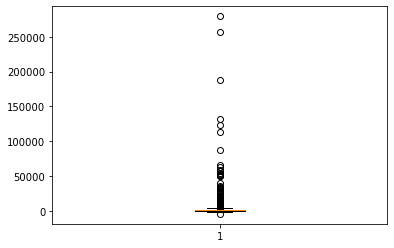

In [28]:
plt.boxplot(grouped_df['monetary'])
plt.show()

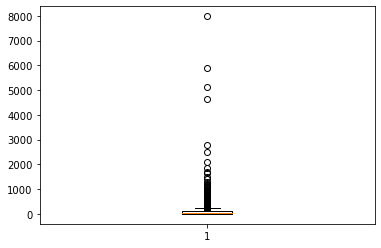

In [29]:
plt.boxplot(grouped_df['frequency'])
plt.show()

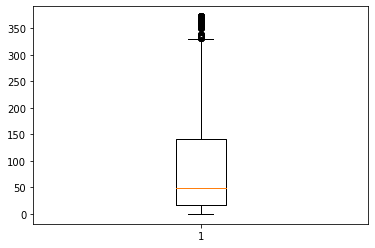

In [30]:
plt.boxplot(grouped_df['recency'])
plt.show()

- Here for recency rather than removing those customers who haven't made a transaction within the last 300 days or so( and there are a lot of them), we could put them in a separate cluster which could help us and the customer for analysis

#### Rescaling
- Very important for clustering as it uses Euclidean Distances to form clusters.
- Out of scale values can severly impact the formation of clusters
- No sense of scaling the CustomerID
- We will create a separated df and scale it using StandardScaler

In [31]:
## importing libraries
from sklearn.preprocessing import StandardScaler

In [32]:
## creating dataframe for scaling
rfm_df  = grouped_df.drop('CustomerID',axis = 1)
rfm_df.head()

,monetary,frequency,recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309


In [33]:
# Applying scaling
## insantaiting object of StandardScaler class
scaler = StandardScaler()
## fit_transform
rfm_scaled = scaler.fit_transform(rfm_df)
rfm_scaled

array([[-0.23100099, -0.3917197 ,  2.32202285],
       [ 0.29343167,  0.38265697, -0.89373323],
       [-0.01231622, -0.26695902, -0.1691956 ],
       ...,
       [-0.20951263, -0.34439668, -0.83418219],
       [ 0.02390005,  2.85205812, -0.87388289],
       [-0.00744423, -0.0991774 , -0.48680114]])

- Scaled, ready for clustering
- But Converted to numpy array so let's convert this to dataframe

In [34]:
## converting to dataframe
rfm_scaled = pd.DataFrame(rfm_scaled)
rfm_scaled.head()

,0,1,2
0,-0.231001,-0.391720,2.322023
1,0.293432,0.382657,-0.893733
2,-0.012316,-0.266959,-0.169196
3,-0.017146,-0.086271,-0.725005
4,-0.190312,-0.327188,2.163220


In [35]:
## renamning columns
rfm_scaled.columns = rfm_df.columns
rfm_scaled.head()

,monetary,frequency,recency
0,-0.231001,-0.391720,2.322023
1,0.293432,0.382657,-0.893733
2,-0.012316,-0.266959,-0.169196
3,-0.017146,-0.086271,-0.725005
4,-0.190312,-0.327188,2.163220


- Now let's move to model building

## 4. Model Building
- First we will build a K-Means model with arbitary K and then fine-tune it.

In [36]:
## importing libraries
from sklearn.cluster import KMeans

In [37]:
## instatiating model object
kmeans = KMeans(n_clusters=4,max_iter=50)
## fitting into the model
kmeans.fit(rfm_scaled)

KMeans(max_iter=50, n_clusters=4)

In [38]:
## let's look at lables
kmeans.labels_

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

In [39]:
## label count
len(kmeans.labels_)

4372

- 4372 is the number of Rows in rfm_scaled

### Let's find the Optimal Number of Clusters
- To find the optimum number of clusters, we use two techniques - the `elbow curve method` and the `silhouette score method`. 
-Let's learn about both of them in detail 

- There are some purely statistical approaches to determine the optimal number of clusters
- But in reality the number of segments not only depend on the statistical analysis, but business sense also plays a big role here.
- So the number of segments we propose to the customer should make business sense and also it should be easily explainable.
 - With that in mind, let's look at the techniques that we have 
- The first is the Elbow Curve or the Sum of Squared Distances
    - The idea of the elbow curve is that we create multiple clusters and then we see the percentage of information tht is explained in each of those cluster.
    - And the point where adding a cluster is not beneficial, we stop at that point.
- The other is the SILHOUTTE ANALYSIS


### Elbow Curve or the Sum of Squared Distances
- Steps
  - We first defines a range of clusters that we want to experiment with ( we generally limit this to 8 or 9 max)
  -  Then we run a 'for loop' which iterates through the range defined above and makes different K-Means models for each value of K in the range
  - We also maintain a SSD list which basically keeps the Sum of Squared Distances(SSDs) of samples to their closets cluster for each vale of K. For this we use .inertia_ function
  - Then we plot SSDs for each n_clusters
  - Looking at the plot we will look for the point where the SSDs start dropping less significantly i.e the slope drop becomes gradual, with a given number of clusters
  - Remember, SSDs will always drop with increase in the number of clusters, what we are looking for is a significant drop that sort of immitates an elbow on the curve!
  - So, from the statistical viewpoint, we choose k as the point where we see the elbow, but remember that we also have to incorporate business objectives while choosing the value of k.
  


In [40]:
## elbow-curve SSD
## intialising empty SSD list
ssd = []
## list of K's to be used
range_n_clusters = [2,3,4,5,6,7,8,9]
## the for loop
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
    ## fitting
    kmeans.fit(rfm_scaled)
    ## appending to SSD list
    ssd.append(kmeans.inertia_)

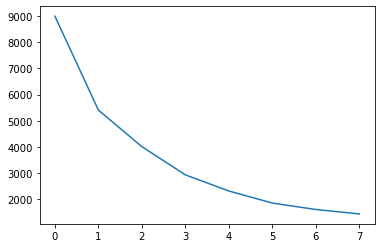

In [41]:
## plotting ssd 
plt.plot(ssd)
plt.show()

- Here 0,1,2.. on X-axis correspond to K = [2,3,4,5,6,7,8,9]
- So for X=1 or K=3, we see the elbow.
- Statistically by using elbow-curve, K=3 should be the optimal number of clusters.

- Now let's look at  Silhouette Score

##  Silhouette Analysis
- It is basically a measure of goodness of the clusters that we have created 
- The goodness is based on cohesion(how similar a data point is to its own cluster) and seperation(how dissimilar a data point is to other own cluster/s)
- So optimal clusters — the clusters with minimum intra-cluster distance and maximum inter-cluster distance.
- The combination of these two ideas is encapsulated in the Silhoutte Score
$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

- This is the silhoutte score for one data point, we consider all the points and then average all the silhoutte scores for different values of K
- Whichever Number of clusters has the maximum silhoutte score we choose that as the optimal number of clusters

#### Approach
- again we create a list of different values of K
- we fit the K-Means model for each K using the 'for-loop'
- We check the silhoutte score for each K
- Choose the number of clusters for which we get maximum Silhoutte Score

### Silhoutte Ananlysis Model

In [42]:
## importing library
from sklearn.metrics import silhouette_score

In [43]:
rfm_scaled.head()

,monetary,frequency,recency
0,-0.231001,-0.391720,2.322023
1,0.293432,0.382657,-0.893733
2,-0.012316,-0.266959,-0.169196
3,-0.017146,-0.086271,-0.725005
4,-0.190312,-0.327188,2.163220


In [44]:
## list of k values
range_n_clusters = [2,3,4,5,6,7,8,9]
for num_clusters in range_n_clusters:
    ## instantiating K-Means
    kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
    ## fitting
    kmeans.fit(rfm_scaled)
    ## cluster lables
    ## why do we need cluster lables?
    ## for each data point we need to tell silhouette_score which cluster it is a part of
    cluster_labels = kmeans.labels_
    ## silhoutte score
    silhouette_avg = silhouette_score(rfm_scaled,cluster_labels)
    ## lables_ are being assigned by kmeans and rfm_scaled comprises of the data-poitns
    ## lables represent the cluster assignment for each point by the kmeans
    ## e.g. here label 6 for a point means that it has been assigned the cluster k=6
    print(f'For n_clusters =  {num_clusters}, the silhouette score is {silhouette_avg}')
print('The labels assigned by kmeans',kmeans.labels_)

For n_clusters =  2, the silhouette score is 0.9344641162235822
For n_clusters =  3, the silhouette score is 0.6003883114752382
For n_clusters =  4, the silhouette score is 0.5982147807169456
For n_clusters =  5, the silhouette score is 0.6148206579543399
For n_clusters =  6, the silhouette score is 0.5856955818362631
For n_clusters =  7, the silhouette score is 0.5237772274142556
For n_clusters =  8, the silhouette score is 0.5159526775380494
For n_clusters =  9, the silhouette score is 0.5105674047704407
The labels assigned by kmeans [1 7 0 ... 0 3 0]


- lables_ are being assigned by kmeans and rfm_scaled comprises of the data-poitns
- lables represent the cluster assignment for each point by the kmeans
- e.g. here label 6 for a point means that it has been assigned the cluster k=6
- so lables and rfm_scaled helps the silhoutte_score in determing p and q 

- Elbow curve gave a value of K = 3 whereas silhouette_score is indicating a value of K=2
- The way to look at it is that silhouette_score gives us a range of potentially good values for K
- We finalise the value of K based on both elbow curve and silhoutte score plus the business considerations
- What is 'statistically  optimal' is not necessarily optimal for our model.
- Ultimately it is the business problem that determines the 'optimal' value of K
- looking at all these considerations we will go with K=3 for our  model and see if it generates clsuters which are interpretable by the business and which are intutive enough

## MODEL with K=3 

In [45]:
## instantiating model object
kmeans  = KMeans(n_clusters=3,max_iter=50)
## fitting into model
kmeans.fit(rfm_scaled)

KMeans(max_iter=50, n_clusters=3)

In [46]:
## checking the lables 
kmeans.labels_

array([2, 0, 0, ..., 0, 0, 0], dtype=int32)

## Cluster Analysis
- First we need to assign the Cluster IDs that we generated to each of the datapoints that we have with us i.e assigning cluster lables to CustomerID
- The next step is interesting because we need to perform a bit of outlier analysis once again to understand how the dataset works here.
-Now once the outlier analysis is completed, we'll go ahead and analyse all the clusters that we have with us.

In [47]:
grouped_df.head()

,CustomerID,monetary,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [48]:
## assigning the labels
## we will again go back to grouped_df as it has the CustomerID which is a unique marker 
## the labels re in order
## so we will simply concatenate lables with grouped_df
grouped_df['cluster_ID'] = kmeans.labels_
grouped_df.head()

,CustomerID,monetary,frequency,recency,cluster_ID
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


- Now each customer has all the RMF features plus cluster ID assigned to it
- Since we have 3 clusters, the cluster ID's will be 0,1 and 2 

### Summary Statistics for each of the cluster_ID
### Outlier analysis
- Let's see the distribution of monetary, frequency and recency across each of the three clusters to see what these clusters represent intuitively.

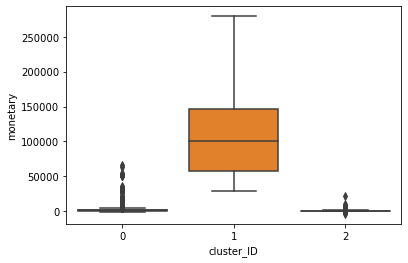

In [49]:
## for monetary
sns.boxplot(x='cluster_ID',y='monetary',data=grouped_df)
plt.show()


- The monetary varies much lesser in clusters 0 and 1 than in cluster 2.

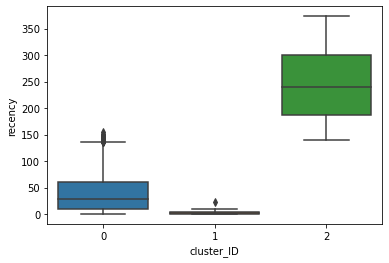

In [50]:
## for recency
sns.boxplot(x='cluster_ID',y='recency',data=grouped_df)
plt.show()

 - Cluster 2 is most recent apparently.
 - cluster 1 has data points whose last purchase was a long time ago

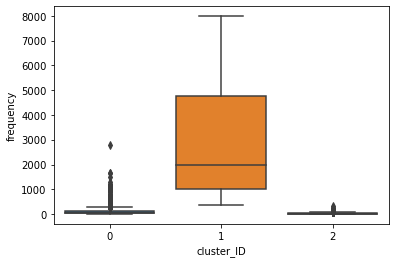

In [51]:
## frequency
sns.boxplot(x='cluster_ID',y='frequency',data=grouped_df)
plt.show()

- customers in cluster 2 shop more frequently

#### What we do next depends on the problem that we are trying to solve
- The plots obtained above are sort of hard to present to the customer for visualisations
- Secondly it also indicated presence of actual outliers  
- We should go back to the client and consult about these values
- We will go back to the preprocessing stage and remove the outliers, and for now, we will just stick to the statistical outliers 

### Removing statistical  outliers
- We will stick to removing top and bottom 5 percentile.
- The tarditioanl approach of limiting IQR between 25%-75% wipes out 50% OF data that we have

In [52]:
rfm_new = rfm_df
rfm_new.head()

,monetary,frequency,recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309


In [53]:
grouped_df.head()

,CustomerID,monetary,frequency,recency,cluster_ID
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


In [59]:
grouped_df_new = grouped_df.drop('cluster_ID',axis=1)
grouped_df_new.head()

,CustomerID,monetary,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [60]:
# removing (statistical) outliers
Q1 = grouped_df_new.monetary.quantile(0.05)
Q3 = grouped_df_new.monetary.quantile(0.95)
IQR = Q3 - Q1
grouped_df_new = grouped_df_new[(grouped_df_new.monetary >= Q1 - 1.5*IQR) & (grouped_df_new.monetary <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = grouped_df_new.recency.quantile(0.05)
Q3 = grouped_df_new.recency.quantile(0.95)
IQR = Q3 - Q1
grouped_df_new = grouped_df_new[(grouped_df_new.recency >= Q1 - 1.5*IQR) & (grouped_df_new.recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = grouped_df_new.frequency.quantile(0.05)
Q3 = grouped_df_new.frequency.quantile(0.95)
IQR = Q3 - Q1
grouped_df_new = grouped_df_new[(grouped_df_new.frequency >= Q1 - 1.5*IQR) & (grouped_df_new.frequency <= Q3 + 1.5*IQR)]

### Rescaling

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_new  = grouped_df_new[['monetary','frequency','recency']]
rfm_scaled_new = scaler.fit_transform(rfm_new)
rfm_scaled_new

array([[-0.72373821, -0.75288754,  2.30161144],
       [ 1.73161722,  1.04246665, -0.90646561],
       [ 0.30012791, -0.46363604, -0.18365813],
       ...,
       [-0.67769602, -0.70301659,  0.86589794],
       [-0.6231313 , -0.64317145, -0.84705678],
       [ 0.32293822, -0.07464263, -0.50050524]])

In [62]:
## changing to dataframe
rfm_scaled_new = pd.DataFrame(rfm_scaled_new)
rfm_scaled_new.columns = rfm_new.columns
rfm_scaled_new.head()

,monetary,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


## Again starting the model building stage

In [63]:
## instatiating model object
kmeans = KMeans(n_clusters=4,max_iter=50)
## fitting into the model
kmeans.fit(rfm_scaled_new)
## lables
kmeans.labels_

array([1, 3, 0, ..., 1, 0, 0], dtype=int32)

### Finding the Optimal Number of Clusters SSD

#### Elbow curve

In [64]:
## SSD list
ssd = []
range_n_clusters = [2,3,4,5,6,7,8,9]
for num_clusters in range_n_clusters:
    ## instantiating Kmeans
    kmeans  = KMeans(n_clusters=num_clusters,max_iter=50)
    ## fit
    kmeans.fit(rfm_scaled_new)
    ## updating ssd
    ssd.append(kmeans.inertia_)


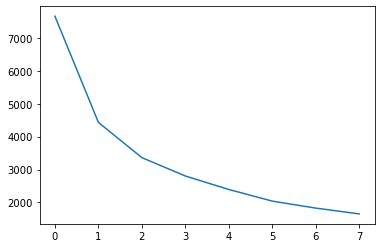

In [65]:
## plotting
plt.plot(ssd)
plt.show()

- Again elbow at k=3

### Silhouette ananlysis

In [66]:
## list of K
range_n_clusters = [2,3,4,5,6,7,8,9]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(rfm_scaled_new)
    ## labels
    cluster_labels = kmeans.labels_
    ## silhouette score
    silhouette_avg = silhouette_score(rfm_scaled_new,cluster_labels)
    print(f'For n_clusters = {num_clusters}, the silhouette score is {silhouette_avg}')
    

For n_clusters = 2, the silhouette score is 0.5415858652525395
For n_clusters = 3, the silhouette score is 0.5084896296141937
For n_clusters = 4, the silhouette score is 0.4796147698531355
For n_clusters = 5, the silhouette score is 0.46613075550600325
For n_clusters = 6, the silhouette score is 0.41707885139850487
For n_clusters = 7, the silhouette score is 0.41724914909727023
For n_clusters = 8, the silhouette score is 0.4027961171669889
For n_clusters = 9, the silhouette score is 0.4122920131620127


## MODEL with K=3

In [67]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_scaled_new)

KMeans(max_iter=50, n_clusters=3)

In [68]:
## labels
kmeans.labels_

array([1, 0, 2, ..., 1, 2, 2], dtype=int32)

### Cluster analysis

In [69]:
grouped_df_new.head()

,CustomerID,monetary,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [70]:
grouped_df_new['cluster_id'] = kmeans.labels_

In [71]:
grouped_df_new.head()

,CustomerID,monetary,frequency,recency,cluster_id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,2
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,1


### Outlier analysis and visaulisation

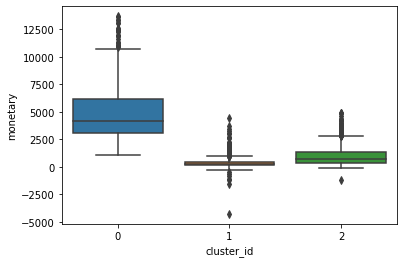

In [72]:
## for monetary
sns.boxplot(x='cluster_id',y='monetary',data=grouped_df_new)
plt.show()


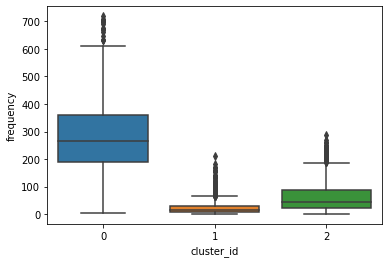

In [73]:
## for frequency
sns.boxplot(x='cluster_id',y='frequency',data=grouped_df_new)
plt.show()

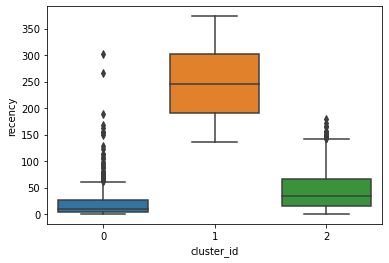

In [74]:
## for recency
sns.boxplot(x='cluster_id',y='recency',data=grouped_df_new)
plt.show()

# Hierarchical Clustering
- We use scipy : Scientific pyhton

In [75]:
## importing libraries for hierarchichal clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [76]:
## rfm 
rfm_scaled_new.head()

,monetary,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [77]:
## grouped_df_new
grouped_df_new.head()


,CustomerID,monetary,frequency,recency,cluster_id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,2
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,1


### Single Linkage
- We will try this first
- Here, the distance between 2 clusters is defined as the shortest distance between points in the two clusters

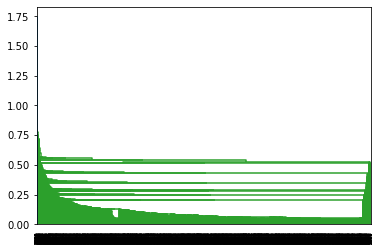

In [78]:
mergings  = linkage(rfm_scaled_new,method='single',metric='euclidean')
dendrogram(mergings)
plt.show()
## matplotlib wraps itself around the dengragram library

- The result is absurd, we dont see the dengrogram.
- The reason is that we are using single linkage and with single linkage the problem is the way it is defined, it just takes the two closest point in two clusters and defines that as the distance  
- But as we saw in the theory that this is not the best way to define distance
- So let's go and try complete linkage

### Complete Linkage

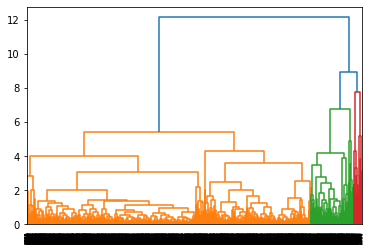

In [80]:
mergings  = linkage(rfm_scaled_new,method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

- Now this is a much better dendrogram
- We know that we can choose any number of clusters based on the horizontal line drawn from the y-axis.
- Let's try a few cluster nuumbers and see which ones make more sense intuitively and are in line with the business objective

### Extracting Clusters from the Dendrogram using the cut_tree module from scipy

#### 3 clusters

In [81]:
cut_tree(mergings,n_clusters=3)

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [82]:
cut_tree(mergings,n_clusters=3).shape

(4293, 1)

- This is a 1-D array of lenght equal to the. number of observations
- For each observation it has assigned a cluster_id 0,1 or 2

In [83]:
# now reshapeing it to a series i.e (4293,0)
## -1 indicates leave 4293 as it is
cluster_labels = cut_tree(mergings,n_clusters=3).reshape(-1,)
cluster_labels

array([0, 1, 0, ..., 0, 0, 0])

- Now its a Numpy series
- Now we can assign the cluster labels

In [85]:
## assigning cluster labels
grouped_df_new['cluster_labels'] = cluster_labels
grouped_df_new.head()

,CustomerID,monetary,frequency,recency,cluster_id,cluster_labels
0,12346.0,0.00,2,325,1,0
1,12347.0,4310.00,182,1,0,1
2,12348.0,1797.24,31,74,2,0
3,12349.0,1757.55,73,18,2,0
4,12350.0,334.40,17,309,1,0


- cluster_id is what we had assigned through K-Means
- cluster_labels is what we assigned through hierarchical clustering 
- Now let's look at the plots and see what these cluster lables actually represent

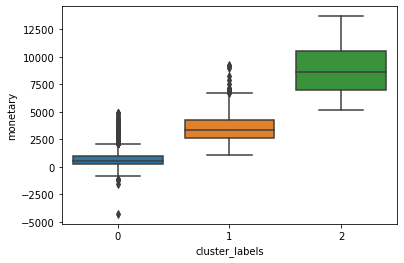

In [86]:
## for monetary
sns.boxplot(x='cluster_labels',y='monetary',data=grouped_df_new)
plt.show()

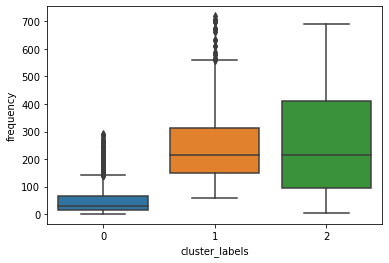

In [87]:
## frequency
sns.boxplot(x='cluster_labels',y='frequency',data=grouped_df_new)
plt.show()

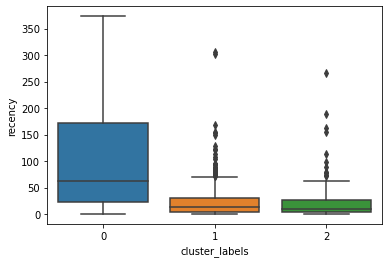

In [88]:
## recency
sns.boxplot(x='cluster_labels',y='recency',data=grouped_df_new)
plt.show()

- In the plot for frequncy we see that clusters 1 and 2 are almost similar in terms of the medians
- In the plot for recency we see that clusters 1 and 2 are almost similar 
- Had we seen a similar trend in the plot for monetary, then we would have concluded that we probably need only two clusters 
- And any more than 3 clusters does not look like a good idea because already for the frequency and the recency curves we see a lot of similarities between cluster 1 and 2